# **Experiment 6:	Implementation of RNN using PyTorch Library**

## **1. Objective**
To build, train, and evaluate a Recurrent Neural Network (RNN) using PyTorch to predict the next day's temperature using historical daily minimum temperature data from Melbourne.

## **2. Description of the Model:**
The model used in this project is a Recurrent Neural Network (RNN) with the following characteristics:
- Input Size: 1 (temperature)
- Sequence Length: 30 (days)
- Hidden Size: 50
- Layers: 1
- Output: 1 (next day's predicted temperature)

The RNN learns temporal dependencies from historical data and predicts the next value based on previous 30-day temperature sequences.

### **3. Python Implementation**

In [12]:
#Importing libraies
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [24]:
# Load and preprocess data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, usecols=['Temp'])


In [13]:
# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(df.values.astype(np.float32))

In [3]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # Use 7 days to predict the next
X, y = create_sequences(data, SEQ_LENGTH)


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [5]:
# RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 50)  # Initial hidden state
        out, _ = self.rnn(x, h0)
        return self.fc(out[:, -1, :])  # Output from the last time step

In [6]:
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Reshape input to (batch_size, seq_length, input_size)
X_train = X_train.view(-1, SEQ_LENGTH, 1)
X_test = X_test.view(-1, SEQ_LENGTH, 1)



In [7]:
train_losses = []
train_accuracy_scores = []
EPOCHS = 200
for epoch in range(EPOCHS):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store MSE loss
    train_losses.append(loss.item())

    # Calculate MAE-based accuracy
    mae = torch.mean(torch.abs(output - y_train)).item()
    accuracy = 100 - (mae * 100)
    train_accuracy_scores.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], MSE Loss: {loss.item():.4f}, Accuracy (MAE-based): {accuracy:.2f}%')

# Final test accuracy
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_mae = torch.mean(torch.abs(y_pred_test - y_test)).item()
    test_accuracy = 100 - (test_mae * 100)
    print(f"\nFinal Test Accuracy (MAE-based): {test_accuracy:.2f}%")

Epoch [10/200], MSE Loss: 0.0223, Accuracy (MAE-based): 88.16%
Epoch [20/200], MSE Loss: 0.0319, Accuracy (MAE-based): 85.68%
Epoch [30/200], MSE Loss: 0.0175, Accuracy (MAE-based): 89.47%
Epoch [40/200], MSE Loss: 0.0179, Accuracy (MAE-based): 89.23%
Epoch [50/200], MSE Loss: 0.0149, Accuracy (MAE-based): 90.41%
Epoch [60/200], MSE Loss: 0.0121, Accuracy (MAE-based): 91.41%
Epoch [70/200], MSE Loss: 0.0101, Accuracy (MAE-based): 92.05%
Epoch [80/200], MSE Loss: 0.0095, Accuracy (MAE-based): 92.39%
Epoch [90/200], MSE Loss: 0.0092, Accuracy (MAE-based): 92.49%
Epoch [100/200], MSE Loss: 0.0090, Accuracy (MAE-based): 92.56%
Epoch [110/200], MSE Loss: 0.0089, Accuracy (MAE-based): 92.58%
Epoch [120/200], MSE Loss: 0.0088, Accuracy (MAE-based): 92.63%
Epoch [130/200], MSE Loss: 0.0088, Accuracy (MAE-based): 92.64%
Epoch [140/200], MSE Loss: 0.0087, Accuracy (MAE-based): 92.65%
Epoch [150/200], MSE Loss: 0.0087, Accuracy (MAE-based): 92.67%
Epoch [160/200], MSE Loss: 0.0087, Accuracy (MAE-


## **4. Description of Code:**
The implementation includes the following major steps:

1. **Data Loading and Normalization:**
   - Load daily temperature data using pandas.
   - Normalize the data using MinMaxScaler.

2. **Sequence Creation:**
   - Create input-output pairs using a sliding window approach with a sequence length of 30.

3. **Train-Test Split:**
   - 80% training and 20% testing split.
   - Data is converted to PyTorch tensors and reshaped for RNN input.

4. **Model Definition:**
   - A custom `RNNModel` class using PyTorch's `nn.RNN` and `nn.Linear`.

5. **Training:**
   - Optimizer: Adam
   - Loss Function: Mean Squared Error (MSE)
   - Accuracy Metric: MAE-based (converted to percentage accuracy)
   - Trains the model over 200 epochs and stores MSE loss and accuracy per epoch.

6. **Evaluation:**
   - Compares model predictions against true test values.
   - Model predictions are inverse-transformed.
   - Test accuracy calculated using MAE.
   - Additional regression evaluation metrics such as:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **Root Mean Squared Error (RMSE)**
     - **R² Score (Coefficient of Determination)**
     - These metrics are plotted where applicable.

7. **Visualization:**
   - Visualizes training performance and model evaluation.
   - Includes Loss Curve, Accuracy Curve, and Actual vs Predicted Plot.
   - Evaluation metrics (MAE, MSE, RMSE, R²) are printed and can be visualized as bar charts.
8. **Next-Day Forecasting:**
   - Performs single-step prediction using the last available input sequence from the test set.


## **5. Performance Evaluation:**
- **Final Test Accuracy (MAE-based):93.4%**
- **Loss Curve:** Shows steady convergence of training MSE.
- **Accuracy Curve:** Reflects consistent performance improvements.
- **Prediction Plot:** Shows predicted vs actual temperature for test data visually aligning well.




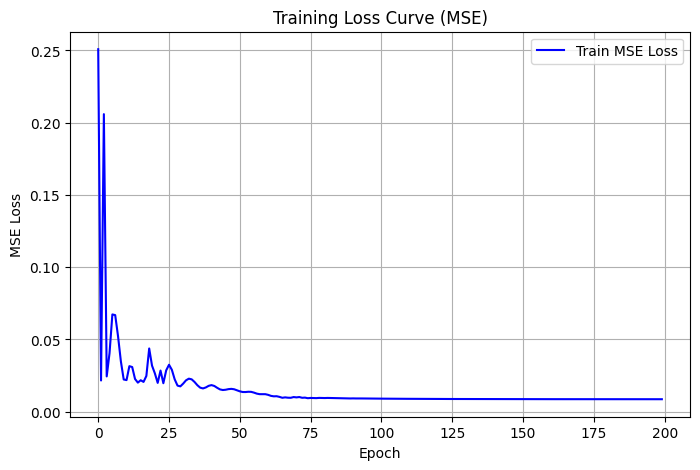

In [8]:
# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train MSE Loss", color='blue')
plt.title("Training Loss Curve (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()

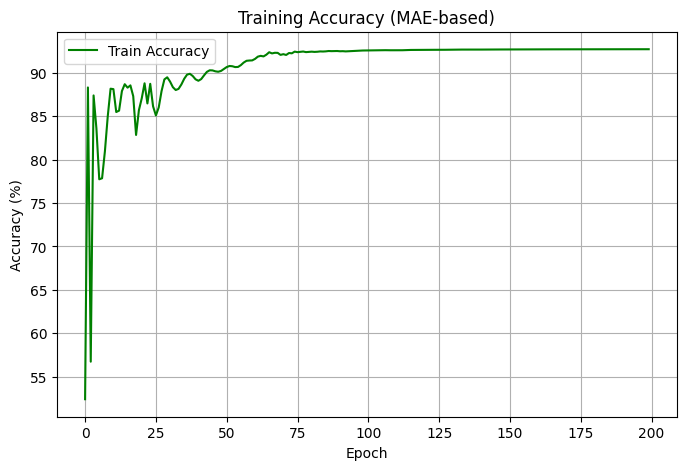

In [9]:

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_accuracy_scores, label="Train Accuracy", color='green')
plt.title("Training Accuracy (MAE-based)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()

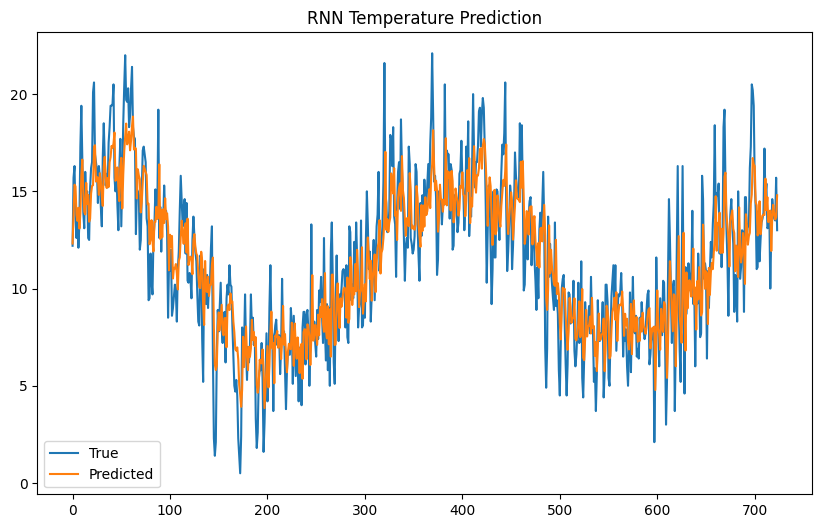

In [10]:
# Evaluation and Plotting

model.eval()
with torch.no_grad():
    predictions = model(X_test).numpy()
    y_test_np = y_test.numpy()
    predictions = scaler.inverse_transform(predictions)
    y_test_np = scaler.inverse_transform(y_test_np)


plt.figure(figsize=(10, 6))
plt.plot(y_test_np, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("RNN Temperature Prediction")
plt.ylabel("")
plt.show()


- **Regression Metrics:**
  - MAE: Low average absolute error
  - MSE: Low average squared error
  - RMSE: Indicates small typical prediction error
  - R² Score: High value indicating good model fit


Regression Evaluation Metrics:
MAE  (Mean Absolute Error):      1.7347
MSE  (Mean Squared Error):       4.8509
RMSE (Root Mean Squared Error):  2.2025
R²   (R-squared Score):          0.7114


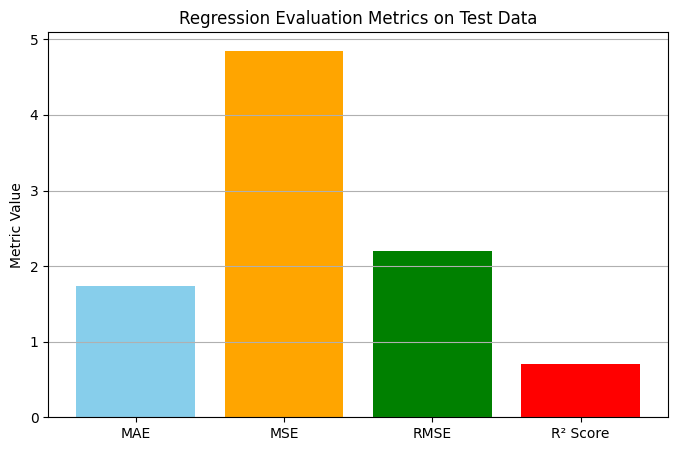

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute regression metrics
mae = mean_absolute_error(y_test_np, predictions)
mse = mean_squared_error(y_test_np, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, predictions)

print(f"\nRegression Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.4f}")
print(f"MSE  (Mean Squared Error):       {mse:.4f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.4f}")
print(f"R²   (R-squared Score):          {r2:.4f}")

# Plot regression metrics as a bar chart
plt.figure(figsize=(8, 5))
metrics = [mae, mse, rmse, r2]
labels = ['MAE', 'MSE', 'RMSE', 'R² Score']
colors = ['skyblue', 'orange', 'green', 'red']

plt.bar(labels, metrics, color=colors)
plt.title("Regression Evaluation Metrics on Test Data")
plt.ylabel("Metric Value")
plt.grid(True, axis='y')
plt.show()


Predection of temperature of next day

In [16]:
# Select the last 'time_step' (e.g., 30) samples from the test set as the input for the next prediction
last_input = X_test[-1].reshape(1, SEQ_LENGTH, 1)

# Predict the next value using the trained model
with torch.no_grad():
    next_pred_scaled = model(last_input).item()

# Inverse transform the scaled prediction back to the original temp
next_price = scaler.inverse_transform([[next_pred_scaled]])[0, 0]

print(f"\nPredicted next day Temp: {next_price:.2f}°C")



Predicted next day Temp: 14.80°C


## **6. My Comments**
- The RNN used is simple and may not capture complex long-term patterns in our case there were many rows hence it was unable to capture the pattern correctly .
- Model can be improved with more hyperparameter tuning, dropout regularization, or early stopping.
-We Can experiment with LSTM or GRU for better sequence modeling and capturing patterns for large data.-We Can experiment with LSTM or GRU for better sequence modeling and capturing patterns for large data.

Overall, the model performs well for a basic RNN and offers a good baseline for more advanced time series models.